In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from volatility_arb import garch_forecast

## Model Setup

In [4]:
# OMXS30 daily returns from 2015-10-01 to 2025-10-01
ind_rets = pd.read_csv("OMXS30_rets_vol.csv", header=0, index_col=0, parse_dates=True).dropna()

rets = ind_rets["OMXS30"]
start = rets.index[0]
end = rets.index[-1]
model='GARCH'
mean='Constant'
horizon = 21
lookback = 756

## Realized Variance Estimation

In [6]:
real_var_est = garch_forecast(
    rets=rets, start_date=start, end_date=end, model=model, mean=mean, horizon=horizon, lookback=lookback,
    p=1, q=1
)

period_start = real_var_est.index[0]
integrated_real_var = (rets[period_start:].rolling(21).std() ** 2) * 252
real_var_rel_err = (real_var_est / integrated_real_var) - 1
real_var_abs_err = (real_var_est - integrated_real_var)

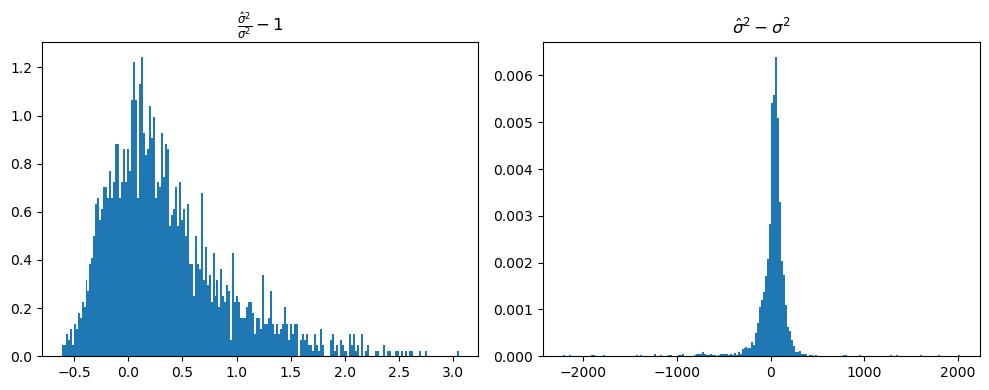

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(real_var_rel_err, density=True, bins=200)
ax[0].set_title(r"$\frac{\hat{\sigma}^2}{\sigma^2} - 1$")

ax[1].hist(real_var_abs_err, density=True, bins=200)
ax[1].set_title(r"$\hat{\sigma}^2 - \sigma^2$")

fig.tight_layout()
plt.show()